# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('US_NLDAS_AirTemp_1979_2011-Copy1.txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,23.65
1,NaN,"Jan 02, 1979",1979/01/02,24.75
2,NaN,"Jan 03, 1979",1979/01/03,25.46
3,NaN,"Jan 04, 1979",1979/01/04,25.05
4,NaN,"Jan 05, 1979",1979/01/05,25.42
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,43.43
12049,NaN,"Dec 28, 2011",2011/12/28,45.13
12050,NaN,"Dec 29, 2011",2011/12/29,48.15
12051,NaN,"Dec 30, 2011",2011/12/30,49.93


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df.fillna('no data available')

In [5]:
df = df.drop(['Notes'], axis = 1)

>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Dates']=pd.to_datetime(df['Month Day, Year'], errors='raise')
df[['Month Day, Year','Dates']]

,"Month Day, Year",Dates
0,"Jan 01, 1979",1979-01-01
1,"Jan 02, 1979",1979-01-02
2,"Jan 03, 1979",1979-01-03
3,"Jan 04, 1979",1979-01-04
4,"Jan 05, 1979",1979-01-05
...,...,...
12048,"Dec 27, 2011",2011-12-27
12049,"Dec 28, 2011",2011-12-28
12050,"Dec 29, 2011",2011-12-29
12051,"Dec 30, 2011",2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df[['Year', 'Month', 'Day']]=df['Dates'].apply(lambda x: pd.Series(str(x).split("-")))
df=df.drop(df[['Month Day, Year', 'Month Day, Year Code']], axis=1)
df

,Avg Daily Max Air Temperature (F),Dates,Year,Month,Day
0,23.65,1979-01-01,1979,01,01 00:00:00
1,24.75,1979-01-02,1979,01,02 00:00:00
2,25.46,1979-01-03,1979,01,03 00:00:00
3,25.05,1979-01-04,1979,01,04 00:00:00
4,25.42,1979-01-05,1979,01,05 00:00:00
...,...,...,...,...,...
12048,43.43,2011-12-27,2011,12,27 00:00:00
12049,45.13,2011-12-28,2011,12,28 00:00:00
12050,48.15,2011-12-29,2011,12,29 00:00:00
12051,49.93,2011-12-30,2011,12,30 00:00:00


In [8]:
df['DateInt'] = df['Dates'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

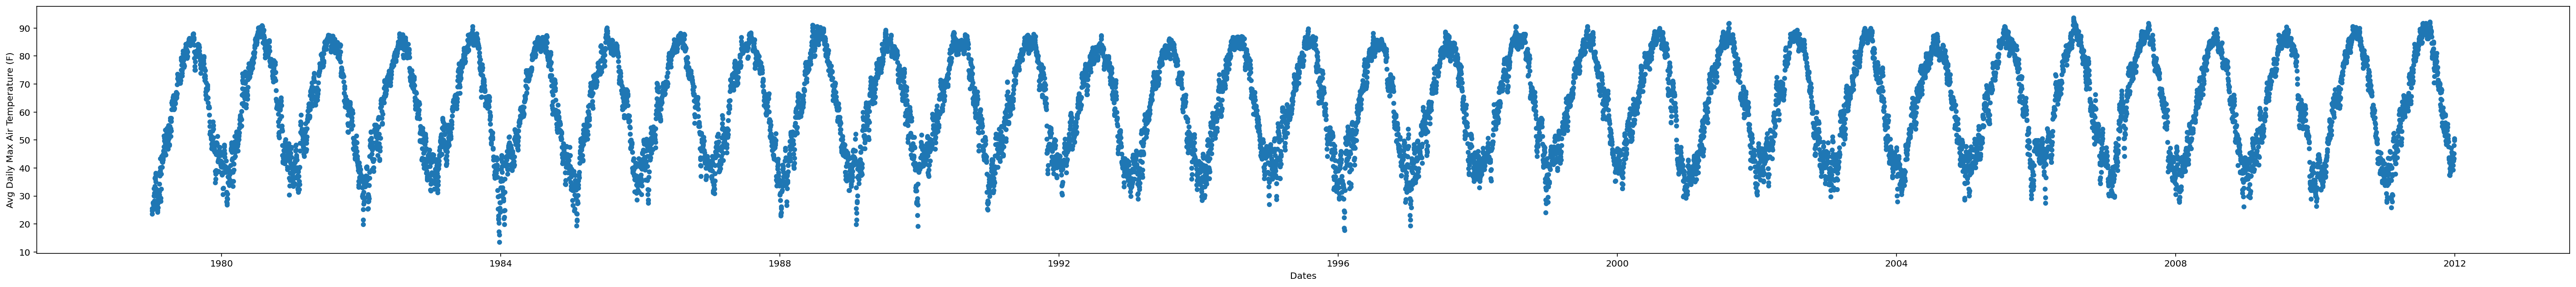

In [9]:
df.plot.scatter(x='Dates', y='Avg Daily Max Air Temperature (F)', figsize=(50, 5));

>5) Describe your plot.

### Adding colors for our graph

In [19]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

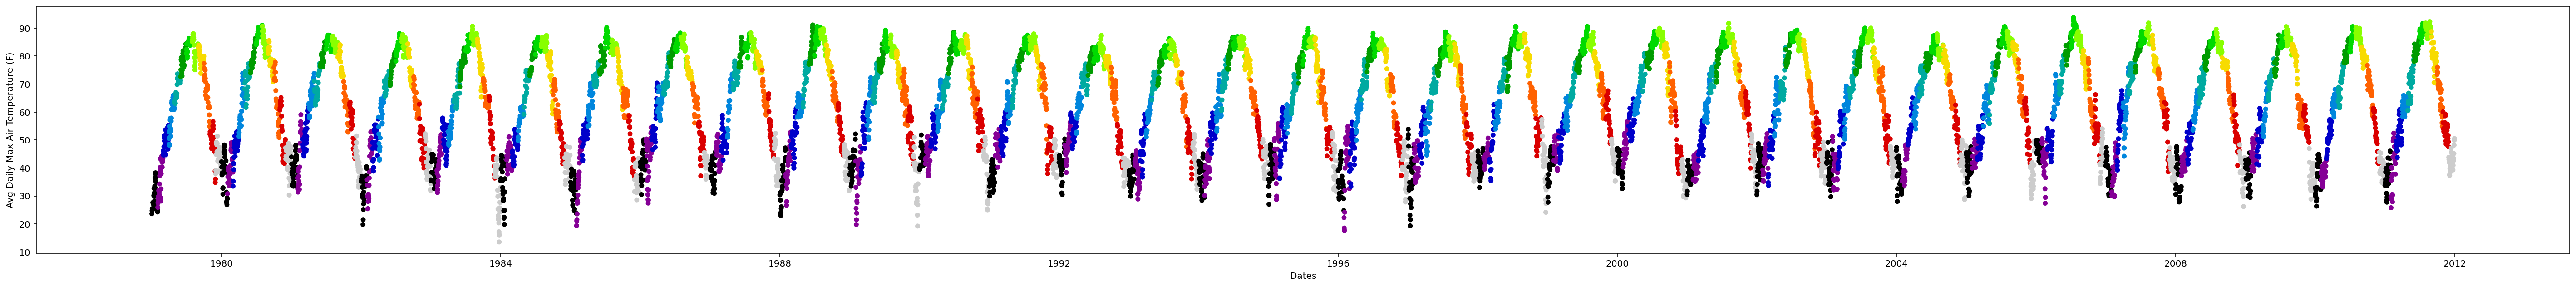

In [20]:
df.plot.scatter(x='Dates', y='Avg Daily Max Air Temperature (F)', figsize=(50, 5), c=df['color']);

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [21]:
df['Month']=df['Month'].map(int)
df['Year']=df['Year'].map(int)

In [22]:
subset=df[df['Dates']<pd.datetime(2002,7,1)]

subset=subset[subset['Dates']>=pd.datetime(2002,1,1)]

In [23]:
subset

,Avg Daily Max Air Temperature (F),Dates,Year,Month,Day,DateInt,color
8401,30.45,2002-01-01,2002,1,01 00:00:00,10098432.0,#000000
8402,31.69,2002-01-02,2002,1,02 00:00:00,10099296.0,#000000
8403,34.15,2002-01-03,2002,1,03 00:00:00,10100160.0,#000000
8404,36.88,2002-01-04,2002,1,04 00:00:00,10101024.0,#000000
8405,38.86,2002-01-05,2002,1,05 00:00:00,10101888.0,#000000
...,...,...,...,...,...,...,...
8577,87.92,2002-06-26,2002,6,26 00:00:00,10250496.0,#009c00
8578,86.66,2002-06-27,2002,6,27 00:00:00,10251360.0,#009c00
8579,86.43,2002-06-28,2002,6,28 00:00:00,10252224.0,#009c00
8580,86.87,2002-06-29,2002,6,29 00:00:00,10253088.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Dates', ylabel='Avg Daily Max Air Temperature (F)'>

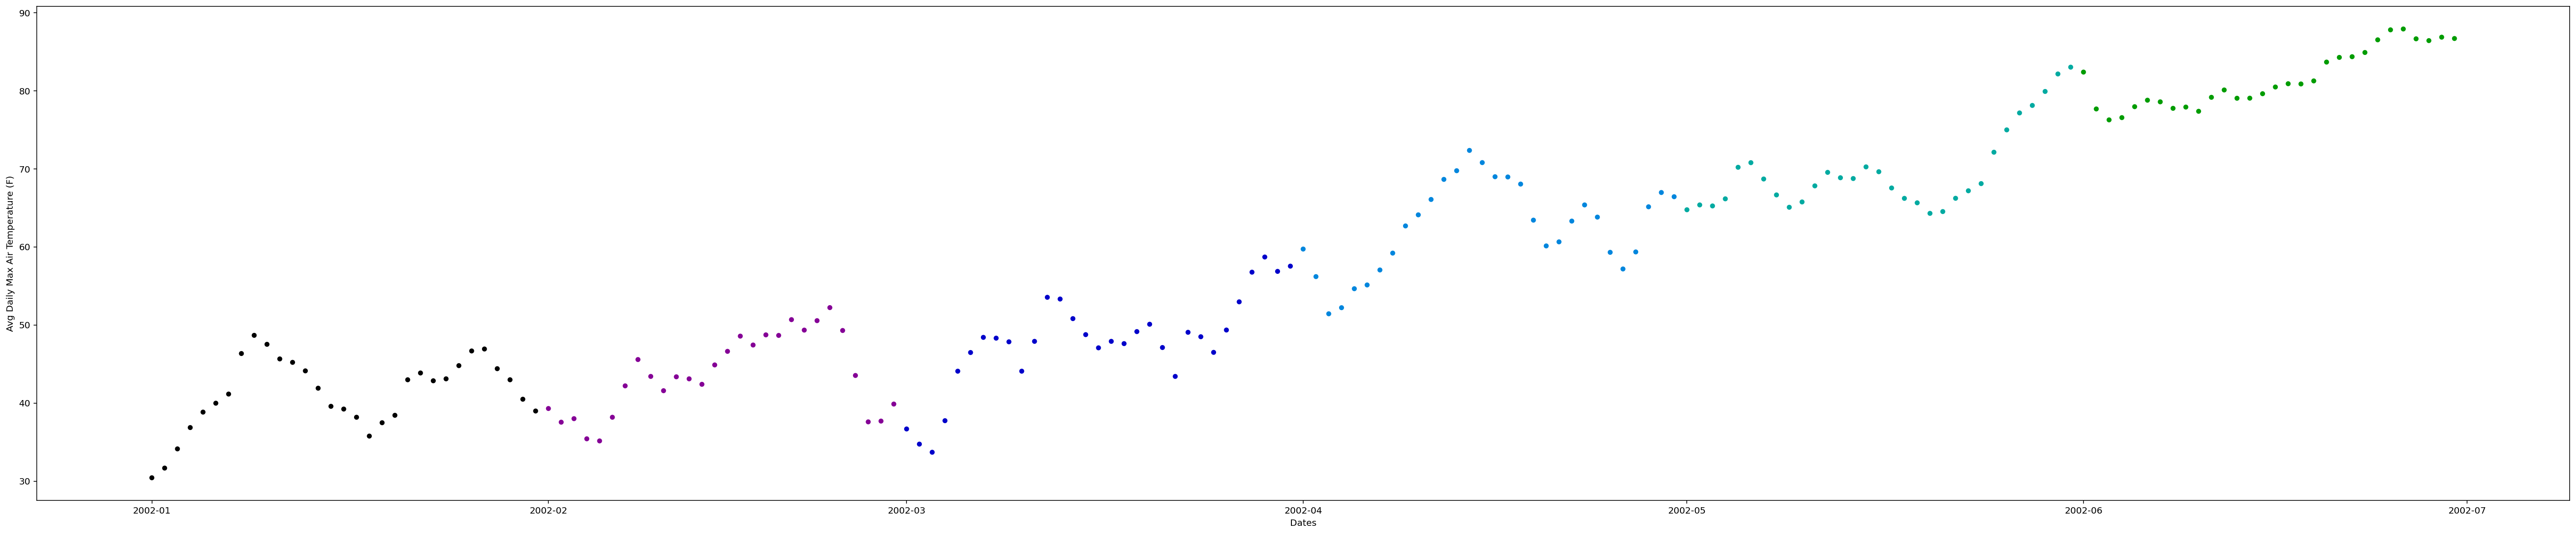

In [24]:
subset.plot.scatter(x='Dates', y='Avg Daily Max Air Temperature (F)', figsize=(50,10),c=subset['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [25]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [26]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [27]:
Y_pred = lin_reg(X,Y)

0.00032481724332553055 -3247.538047355958


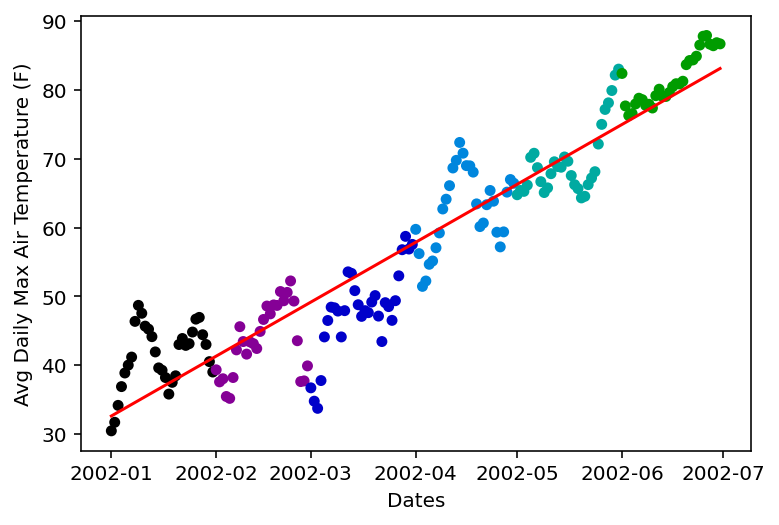

In [28]:
subset.plot.scatter(x='Dates', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Dates'].values), max(subset['Dates'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [29]:
# m = 0.000324817, b = -3247.538

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [30]:
print(min(Y_pred))
print(max(Y_pred))
# positive

32.60679679436589
83.12237447635243


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [32]:
X1=df['DateInt'].values
Y1=df['Avg Daily Max Air Temperature (F)'].values
Y_pred1 = lin_reg(X1,Y1)

2.2290791239964602e-07 60.66575277352726


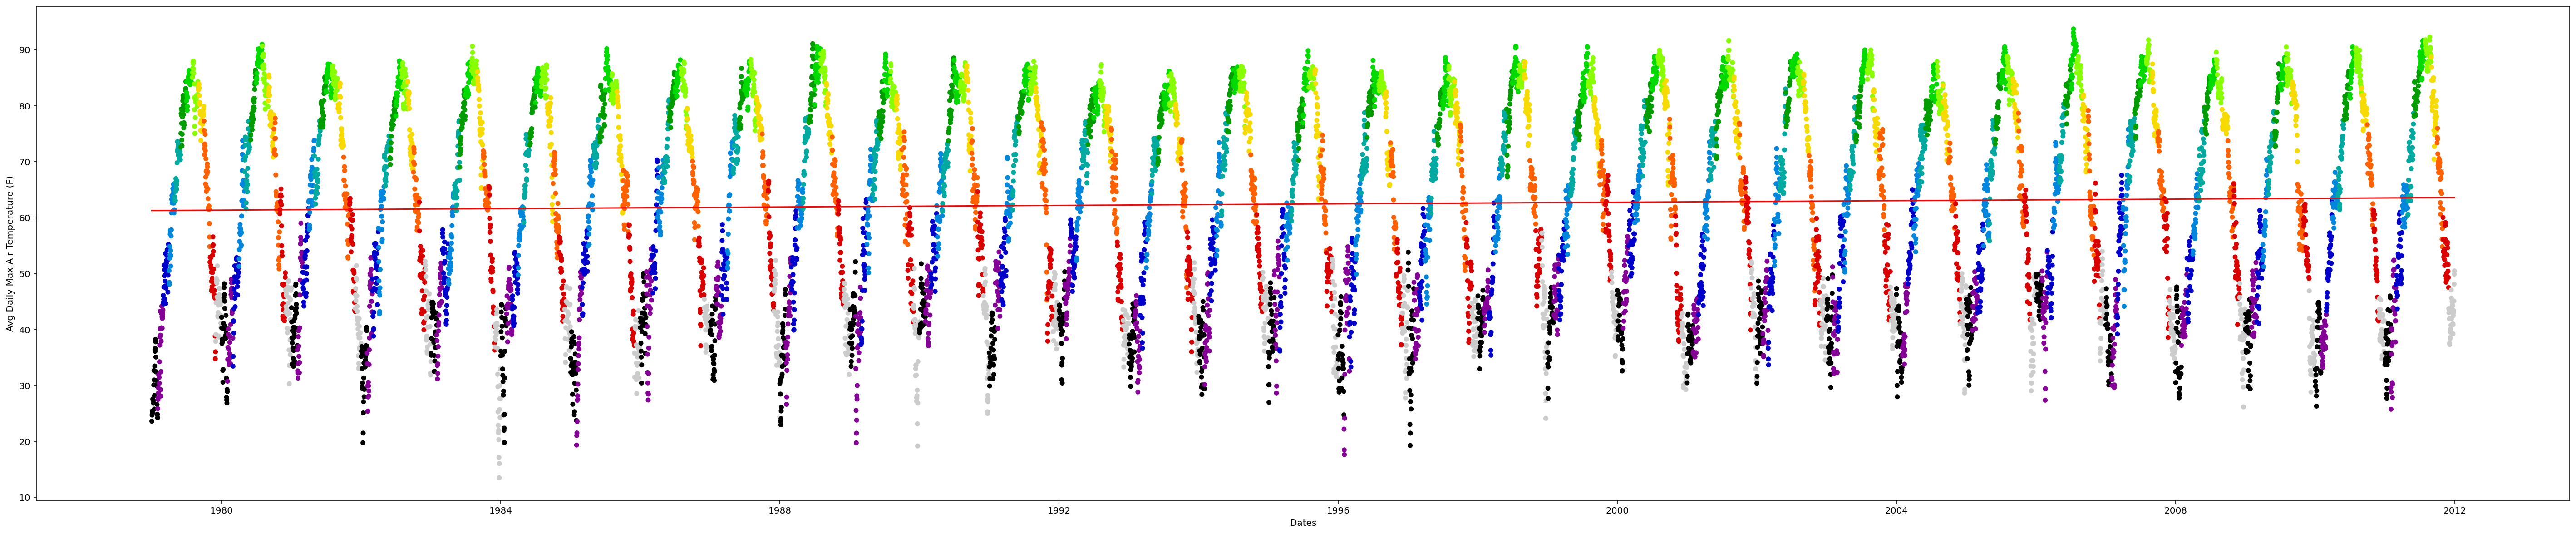

In [34]:
df.plot.scatter(x='Dates', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize=(50, 10))
plt.plot([min(df['Dates'].values), max(df['Dates'].values)], [min(Y_pred1), max(Y_pred1)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
#positive, indicating a gradual upwards change in what the yearly equilibrium temperature is; global warming